### FILTRADO BASE DE DATOS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Levanto la base de datos completa
data = pd.read_csv("/media/eferrante/Data/Code/genderbias/CheXNet-Keras-enzo/data/Data_Entry_2017_with_oneHot.csv") 

data.shape

(112120, 25)

# Distribucion de Género original

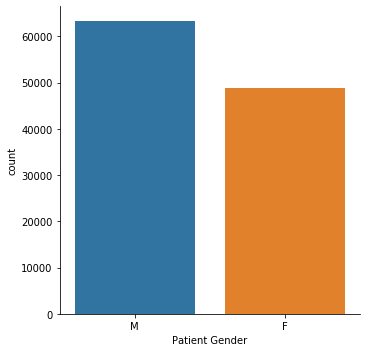

In [2]:
# Histograma de género
sns.catplot(x="Patient Gender", kind="count", data=data);


# Create a dataset where every pathology is "balanced" by gender
First check the original gender unbalance per pathology

In [3]:
illness=['Hernia','Pneumonia','Fibrosis','Emphysema','Edema','Cardiomegaly','Pleural_Thickening','Consolidation','Mass','Pneumothorax','Nodule','Atelectasis','Effusion','Infiltration']
data_female=data[data['Patient Gender'] == 'F']
data_male=data[data['Patient Gender'] == 'M']

for ill in illness:
        # Encuentro la cantidad de mujeres con esta enfermedad  
        data_faux=data_female[data_female[ill] == 1]
        canf=len(data_faux)
        # Encuentro la cantidad de hombres con esta enfermedad
        data_maux=data_male[data_male[ill] == 1]
        canm=len(data_maux)
        # Me quedo con aquel que tenga menor cantidad
        min_cant=np.min([canf,canm])
        # Muestro la enfermedad y la cantidad de imagenes por genero que agrego
        print (ill,canf,canm)    
            
            

Hernia 131 96
Pneumonia 593 838
Fibrosis 771 915
Emphysema 906 1610
Edema 1099 1204
Cardiomegaly 1469 1307
Pleural_Thickening 1343 2042
Consolidation 2001 2666
Mass 2253 3529
Pneumothorax 2585 2717
Nodule 2646 3685
Atelectasis 4653 6906
Effusion 5882 7435
Infiltration 8467 11427


## Then, we filter and to try balance every pathology independently

In [4]:
# Selecciono las imagenes, priorizando aquellas enfermedades que menor cantidad de imagenes tiene
max_ill= 0
i=0 

print("\n**** Before balancing ****")
print("\n*******************************")
print("Pathology", "Female", "Male")
print("*******************************\n")

#Enfermedades
for ill in illness:
        # Encuentro la cantidad de mujeres con esta enfermedad  
        data_faux=data_female[data_female[ill] == 1]
        canf=len(data_faux)
        # Encuentro la cantidad de hombres con esta enfermedad
        data_maux=data_male[data_male[ill] == 1]
        canm=len(data_maux)
        # Me quedo con aquel que tenga menor cantidad
        min_cant=np.min([canf,canm])
        # Muestro la enfermedad y la cantidad de imagenes por genero que agrego
        #print (ill,min_cant)
        print (ill,canf,canm)       

        if i==0: 
            females=data_faux.sample(n=min_cant) 
            males=data_maux.sample(n=min_cant)
            
        else:    
            # Concateno las imagenes de cada enfermedad
            males=pd.concat([males,data_maux.sample(n=min_cant)])
            females=pd.concat([females,data_faux.sample(n=min_cant)])
            # Me aseguro de no incluir dos veces la misma imagen por enfermedad
            males=males.drop_duplicates(subset="Image Index", keep='first')
            females=females.drop_duplicates(subset="Image Index", keep='first')
        i=i+1

    
# Concateno todas las enfermedades
data_ill=pd.concat([males,females])
print("\n**** After balancing ****")
print("\n*******************************")
print("Pathology", "Female", "Male")
print("*******************************\n")

for ill in illness:
        # Encuentro la cantidad de mujeres con esta enfermedad  
        data_faux=females[females[ill] == 1]
        canf=len(data_faux)
        # Encuentro la cantidad de hombres con esta enfermedad
        data_maux=males[males[ill] == 1]
        canm=len(data_maux)
        # Me quedo con aquel que tenga menor cantidad
        min_cant=np.min([canf,canm])
        # Muestro la enfermedad y la cantidad de imagenes por genero que agrego
        print (ill,canf,canm)       
        max_ill = np.max([max_ill,min_cant])
        
# Separo todos los sujetos sanos
data_h=data[data['Finding Labels'] == 'No Finding']  

# Separo por género
data_female_h=data_h[data_h['Patient Gender'] == 'F']
data_male_h=data_h[data_h['Patient Gender'] == 'M']

canf=len(data_female_h)
canm=len(data_male_h)

# Me quedo con aquel que tenga menor cantidad por género
min_cant=np.min([canf,canm])

# Selecciono si elimino por género o por cantidad máxima 
min_cant=np.min([min_cant,max_ill])

data_female_h=data_female_h.sample(n=min_cant)
data_male_h=data_male_h.sample(n=min_cant)

data_h=pd.concat([data_female_h,data_male_h])

data_final=pd.concat([data_ill,data_h])
#data_final=data_ill

print( "\n**** After balancing ****\n")

print('Cantidad de totales')
print(data_final.shape)

print('Chequeo no tener imagenes repetidas')
data_final_aux=data_final.drop_duplicates(subset="Image Index",keep='first')
print(data_final_aux.shape)

print('Cantidad de imagenes de sujetos sanos')
print(data_h.shape)

print('Cantidad de imagenes de sujetos enfermos')
print(data_ill.shape)

print('Cantidad de hombres')
print(len(data_final[data_final['Patient Gender'] == 'M']))

print('Cantidad de mujeres')
print(len(data_final[data_final['Patient Gender'] == 'F']))




**** Before balancing ****

*******************************
Pathology Female Male
*******************************

Hernia 131 96
Pneumonia 593 838
Fibrosis 771 915
Emphysema 906 1610
Edema 1099 1204
Cardiomegaly 1469 1307
Pleural_Thickening 1343 2042
Consolidation 2001 2666
Mass 2253 3529
Pneumothorax 2585 2717
Nodule 2646 3685
Atelectasis 4653 6906
Effusion 5882 7435
Infiltration 8467 11427

**** After balancing ****

*******************************
Pathology Female Male
*******************************

Hernia 111 96
Pneumonia 593 741
Fibrosis 771 839
Emphysema 906 1312
Edema 1099 1161
Cardiomegaly 1403 1307
Pleural_Thickening 1343 1751
Consolidation 2001 2392
Mass 2253 2915
Pneumothorax 2585 2652
Nodule 2646 3130
Atelectasis 4653 5833
Effusion 5882 6818
Infiltration 8467 9779

**** After balancing ****

Cantidad de totales
(63575, 25)
Chequeo no tener imagenes repetidas
(63575, 25)
Cantidad de imagenes de sujetos sanos
(16934, 25)
Cantidad de imagenes de sujetos enfermos
(46641, 25)

## Now we create the training, val and test folds

In [7]:
import os
from sklearn.utils import shuffle

def ensureDir(f):
    d = os.path.dirname(f)
    if not os.path.exists(d):
        os.makedirs(d)

def generate_train_val_test_filtering_by(data_orig, col_filter="Patient ID", 
                                         train_perc=0.7, val_perc = 0.1, test_perc=0.2):
    data_aux = data_orig.copy()
    
    train_num = len(data_aux) * train_perc
    val_num = len(data_aux) * val_perc
    test_num = len(data_aux) * test_perc
    
    print("- Estimated fold sizes -> train: %i, val: %i, test %i"%(train_num, val_num, test_num))
    train_count, val_count, test_count = 0, 0, 0
    
    train_df = pd.DataFrame(columns=data_aux.columns)
    val_df = pd.DataFrame(columns=data_aux.columns)
    test_df = pd.DataFrame(columns=data_aux.columns)
    
    while (len(train_df) < train_num) & (len(data_aux) > 0):
        # Choose a random "col_filter" selected_col_fiter
        choosen = data_aux.sample(n=1).iloc[0][col_filter]
        
        # Filter the rows containing choosen
        choosen_rows = data_aux[data_aux[col_filter] == choosen]
        # Add this rows to training
        train_df = train_df.append(choosen_rows)

        # Remove the rows from data
        data_aux = data_aux.drop(choosen_rows.index)
        
    while (len(val_df) < val_num) & (len(data_aux) > 0):
        # Choose a random "col_filter" selected_col_fiter
        choosen = data_aux.sample(n=1).iloc[0][col_filter]
        
        # Filter the rows containing choosen
        choosen_rows = data_aux[data_aux[col_filter] == choosen]
        
        # Add this rows to training
        val_df = val_df.append(choosen_rows)

        # Remove the rows from data
        data_aux = data_aux.drop(choosen_rows.index)
        
    test_df = data_aux.copy()
    
    print("- Final fold sizes -> train: %i, val: %i, test %i"%(len(train_df), len(val_df), len(test_df)))
    
    return train_df, val_df, test_df  
    
def generate_gender_fold(g, data_local, root_dir, runs=5):

    print ("*****************************************************************")
    print ("Saving folds for **" + g + "** to : " + root_dir)
    print ("*****************************************************************\n")

    ensureDir(root_dir)

    # Separo por genero
    data_filtered = data_local[data_local['Patient Gender'] == g]

    gender_dir = os.path.join(root_dir, g)
    ensureDir(gender_dir)
    
    for i in range(runs):
        print ("Generating fold " + str(i))
        run_dir = os.path.join(root_dir, g +"/run_" + str(i) + "/")
        ensureDir(run_dir)

        tr, val, tst = generate_train_val_test_filtering_by(data_filtered, col_filter="Patient ID", 
                                         train_perc=0.7, val_perc = 0.1, test_perc=0.2)
        
        tr.to_csv(os.path.join(run_dir, "train.csv"), sep=',')
        val.to_csv(os.path.join(run_dir, "dev.csv"), sep=',')
        tst.to_csv(os.path.join(run_dir, "test.csv"), sep=',')
        
###### SCRIPT #######

root_dir = "./experiments/all_pathologies_20_runs_no_healty/"

generate_gender_fold("M",data_final, root_dir, runs=20)
generate_gender_fold("F",data_final, root_dir, runs=20)




*****************************************************************
Saving folds for **M** to : ./experiments/all_pathologies_20_runs_no_healty/
*****************************************************************

Generating fold 0
- Estimated fold sizes -> train: 16990, val: 2427, test 4854
- Final fold sizes -> train: 16991, val: 2431, test 4850
Generating fold 1
- Estimated fold sizes -> train: 16990, val: 2427, test 4854
- Final fold sizes -> train: 16991, val: 2429, test 4852
Generating fold 2
- Estimated fold sizes -> train: 16990, val: 2427, test 4854
- Final fold sizes -> train: 16999, val: 2429, test 4844
Generating fold 3
- Estimated fold sizes -> train: 16990, val: 2427, test 4854
- Final fold sizes -> train: 16992, val: 2428, test 4852
Generating fold 4
- Estimated fold sizes -> train: 16990, val: 2427, test 4854
- Final fold sizes -> train: 16994, val: 2428, test 4850
Generating fold 5
- Estimated fold sizes -> train: 16990, val: 2427, test 4854
- Final fold sizes -> train: 16

# Método para reducir la cantidad de imagenes procentualmente

In [54]:
from sklearn.metrics import roc_auc_score , f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Ills=['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Pneumothorax','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia']

old_output_dir = './experiments/all_pathologies/'
new_output_dir = "./experiments/all_pathologies_05_test_1/"

genders_train=['F']
genders_test=['F','M']

def remove_perc(data, perc=0.5):
    index=range(len(data))
    data_keep, _ = train_test_split(index, test_size = 1. - perc)
    return data.iloc[data_keep]

for gender_train in genders_train:
    for gender_test in genders_test:

        for fold in range(5):
            # Busco los datos las predicciones y las etiquetas de salida
                       
            read_dir= old_output_dir +gender_train+'/run_'+str(fold)+'/'
            write_dir = new_output_dir+gender_train+'/run_'+str(fold)+'/'

            train_file = pd.read_csv(os.path.join(read_dir, "train.csv"))
            val_file = pd.read_csv(os.path.join(read_dir, "dev.csv"))
            test_file = pd.read_csv(os.path.join(read_dir, "test.csv"))
            
            print("Before")
            print(len(train_file))
            print(len(val_file))
            print(len(test_file))
            print("After")
            
            train_keep = remove_perc(train_file, 0.5)
            val_keep = remove_perc(val_file, 0.5)
            test_keep = remove_perc(test_file, 0.5)
            
            print(len(train_keep))
            print(len(val_keep))
            print(len(test_keep))
            print("\n")
            
            ensureDir(write_dir)

            train_keep.to_csv(os.path.join(write_dir,"train.csv"), sep=',')
            val_keep.to_csv(os.path.join(write_dir,"dev.csv"), sep=',')
            test_keep.to_csv(os.path.join(write_dir,"test.csv"), sep=',')

            

Before
21508
3075
6140
After
10754
1537
3070


Before
21507
3073
6143
After
10753
1536
3071


Before
21515
3073
6135
After
10757
1536
3067


Before
21508
3073
6142
After
10754
1536
3071


Before
21507
3075
6141
After
10753
1537
3070


Before
21508
3075
6140
After
10754
1537
3070


Before
21507
3073
6143
After
10753
1536
3071


Before
21515
3073
6135
After
10757
1536
3067


Before
21508
3073
6142
After
10754
1536
3071


Before
21507
3075
6141
After
10753
1537
3070




In [31]:
# Desbalances de género
N_males=float(len(males))
N_females=float(len(females))
print('Desbalance M/F en General ',(N_males)/(N_females))

data_female_i=data_ill[data_ill['Patient Gender'] == 'F']
data_male_i=data_ill[data_ill['Patient Gender'] == 'M']

for ill in illness:
    
        # Encuentro la cantidad de mujeres con esta enfermedad  
        data_faux=data_female_i[data_female_i[ill] == 1]
        canf=float(len(data_faux))
        # Encuentro la cantidad de hombres con esta enfermedad
        data_maux=data_male_i[data_male_i[ill] == 1]
        canm=float(len(data_maux))
        
        print('Desbalance M/F en' ,ill, (canm)/(canf))

('Desbalance M/F en General ', 1.0955737116178847)
('Desbalance M/F en', 'Hernia', 1.0491803278688525)
('Desbalance M/F en', 'Pneumonia', 1.1507177033492824)
('Desbalance M/F en', 'Fibrosis', 1.0513307984790874)
('Desbalance M/F en', 'Emphysema', 1.3300970873786409)
('Desbalance M/F en', 'Edema', 1.133159268929504)
('Desbalance M/F en', 'Cardiomegaly', 0.9041533546325878)
('Desbalance M/F en', 'Pleural_Thickening', 1.216796875)
('Desbalance M/F en', 'Consolidation', 1.1604938271604939)
('Desbalance M/F en', 'Mass', 1.2164502164502164)
('Desbalance M/F en', 'Pneumothorax', 0.7095238095238096)
('Desbalance M/F en', 'Nodule', 1.1346153846153846)
('Desbalance M/F en', 'Atelectasis', 1.2510121457489878)
('Desbalance M/F en', 'Effusion', 1.0341207349081365)
('Desbalance M/F en', 'Infiltration', 1.109251101321586)


#  Guardado de archivos

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os

def ensure_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
     
    

data_female=data_final[data_final['Patient Gender'] == 'F']
data_male=data_final[data_final['Patient Gender'] == 'M'] 

index=range(len(data_female))


print(len(data_female))
print(len(data_male))

for i in range(5):  #plt.xticks((names))

    # Genero los indices de train test y validacion
    idx_train, idx_test = train_test_split(index, test_size=0.2, random_state=i)
    idx_train, idx_val = train_test_split(idx_train, test_size=0.1, random_state=i)
    
    
    print(len(idx_train))
    print(len(idx_val))
    print(len(idx_test))
    
    # Randomizo los datos
    data_female=shuffle(data_female)
    data_male=shuffle(data_male)    
    
    # Separo los conjuntos
    train_male= (data_male.iloc[idx_train])
    val_male= (data_male.iloc[idx_val])
    test_male= (data_male.iloc[idx_test])      
    # Separo los conjuntos
    train_female= (data_female.iloc[idx_train])
    val_female= (data_female.iloc[idx_val])
    test_female= (data_female.iloc[idx_test])               
    
    # Guardo los conjuntos generados
    save_dirm="./experiments/paper/f"+str(i)+"_male/"
    save_dirf="./experiments/paper/f"+str(i)+"_female/"
    ensure_dir(save_dirm)
    ensure_dir(save_dirf)
    train_male.to_csv(save_dirm+"train.csv", sep=',')
    train_female.to_csv(save_dirf+"train.csv", sep=',')
    val_male.to_csv(save_dirm+"dev.csv", sep=',')
    val_female.to_csv(save_dirf+"dev.csv", sep=',')
    test_male.to_csv(save_dirm+"test.csv", sep=',')
    test_female.to_csv(save_dirf+"test.csv", sep=',')

8756
9193
6303
701
1752
6303
701
1752
6303
701
1752
6303
701
1752
6303
701
1752


# Generar Modelos

In [36]:
import csv 
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd

def ensure_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def save_files(archivo,fold):
   

    output_dir= "/home/alarrazabal/pc49/home/alarrazabal/DATOS/Code/bias/PaperCheXNet/experiments/paper/"
    
    
    data_f = output_dir+'f'+str(fold)+'_female/'+archivo+'.csv'
    data_m = output_dir+'f'+str(fold)+'_male/'+archivo+'.csv'
    
    male=pd.read_csv(data_m)
    female=pd.read_csv(data_f)
       
    index=range(len(male))

    
    for i in range(11): 
        
        
        if (i==0):
            idx_train_male= index
            idx_train_female=[]
        elif i==10 :
            idx_train_male=[]
            idx_train_female=index
        else:
             
            idx_train_male, idx_test = train_test_split(index, test_size=i/10.0, random_state=1)
            idx_train_female, idx_test = train_test_split(index, test_size=1-(i/10.0), random_state=1)  

       
        archivo_male= shuffle(male.iloc[idx_train_male])
        archivo_female= shuffle(female.iloc[idx_train_female])
        archivo_data=shuffle(pd.concat([archivo_male,archivo_female]))    
        
        save_dir=output_dir+"modelo_"+str(fold)+"/fold"+str(i*10)+"xciento_female/"

        ensure_dir(save_dir)
        archivo_data.to_csv(save_dir+archivo+".csv", sep=',')
        

    
archivos=["train","test","dev"]
   
for fold in range (0,5):
    
    for archivo in archivos:    
    
        save_files(archivo,fold)

# Analysis of test data balance 

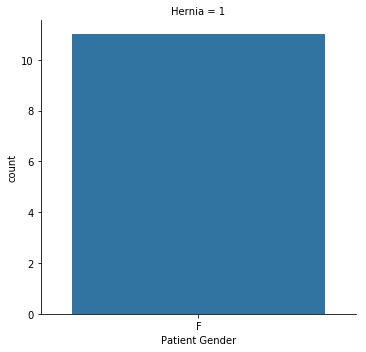

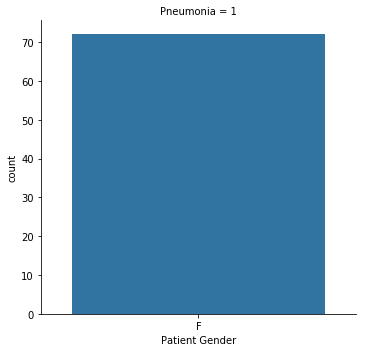

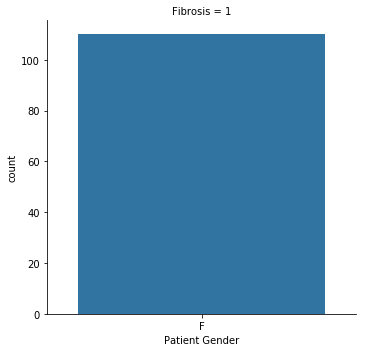

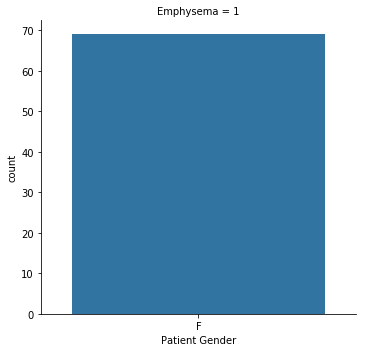

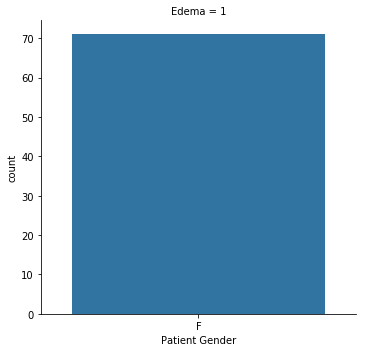

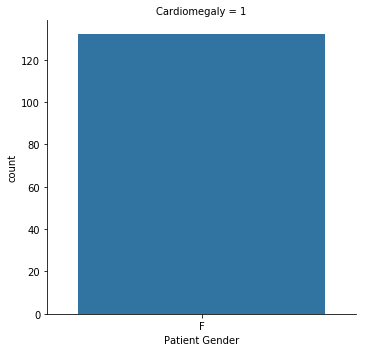

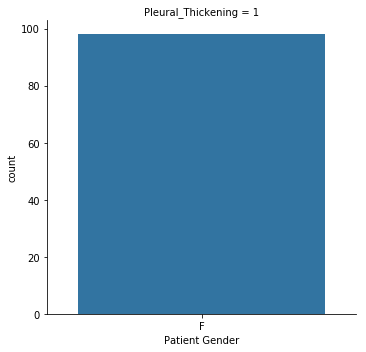

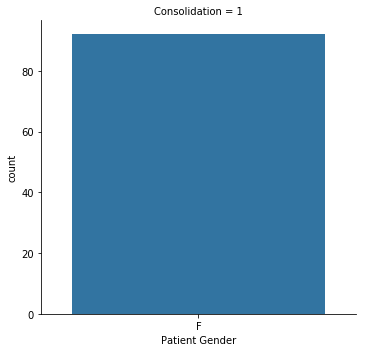

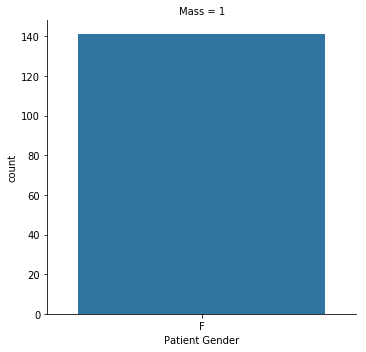

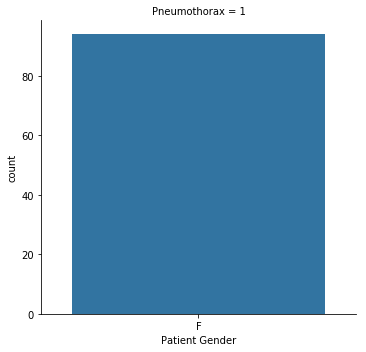

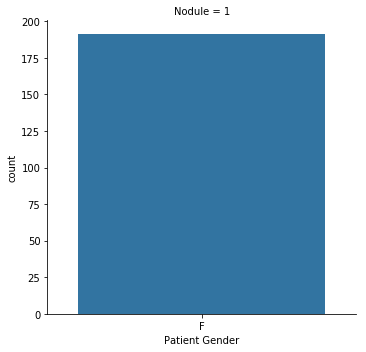

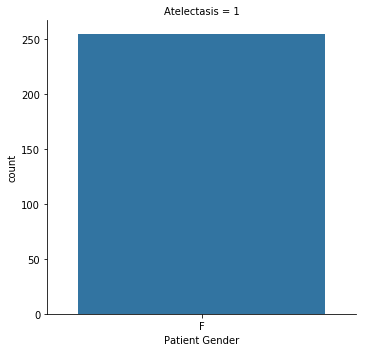

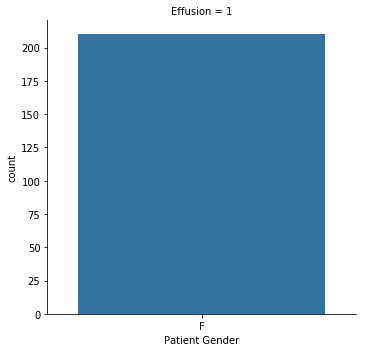

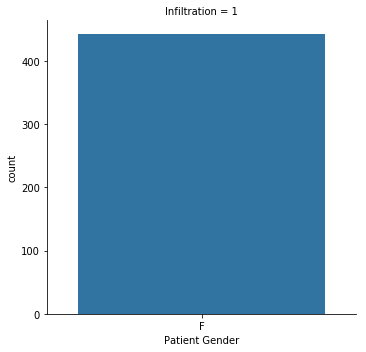

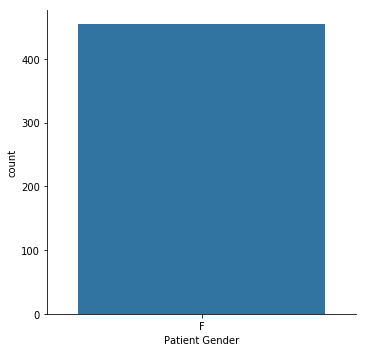

In [37]:
d = pd.read_csv("/home/alarrazabal/pc49/home/alarrazabal/DATOS/Code/bias/PaperCheXNet/experiments/paper/f0_female/test.csv")

# Balance de Género por enfermedad
for ill in illness:
       g=sns.catplot(x="Patient Gender", kind="count", data=d[d[ill] == 1],col=ill)
        
g=sns.catplot(x="Patient Gender", kind="count", data=d[d['Finding Labels'] == 'No Finding'])


In [42]:
import pandas as pd
import seaborn as sns
import numpy as np

# Levanto la base de datos completa
train = pd.read_csv('/media/eferrante/Data/Code/genderbias/CheXNet-Keras-enzo/experiments/all_pathologies/F/run_2/train.csv')
test = pd.read_csv('/media/eferrante/Data/Code/genderbias/CheXNet-Keras-enzo/experiments/all_pathologies/F/run_2/test.csv')

In [41]:
print ("Train: " + str(len(train)))
print ("Test: " + str(len(test)))

filtered=test[test['Patient ID'].isin(train['Patient ID'])]

print (len(filtered))



Train: 21515
Test: 6135
0
